# Plotting the jet afterglow lightcurve of GW170817

For the first time, scientists have directly detected gravitational waves — ripples in
space-time — in addition to light from the spectacular collision of two neutron stars.
This marks the first time that a cosmic event has been viewed in both gravitational
waves and light.


The discovery was made using the U.S.-based Laser Interferometer Gravitational-
Wave Observatory (LIGO); the Europe-based Virgo detector; and some 70
ground- and space-based observatories.



Neutron stars are the smallest, densest stars known to exist and are formed when
massive stars explode in supernovas. As these neutron stars spiraled together,
they emitted gravitational waves that were detectable for about 100 seconds;
when they collided, a flash of light in the form of gamma rays was emitted and
seen on Earth about two seconds after the gravitational waves. In the days and
weeks following the smashup, other forms of light, or electromagnetic radiation —
including X-ray, ultraviolet, optical, infrared, and radio waves — were detected.
The observations have given astronomers an unprecedented opportunity to probe
a collision of two neutron stars.


We used the data for the non-thermal emission from this source that spans across
all frequency bands following a single spectral index of $F_ν ∝ ν^{−0.584}$. The quantity $F_ν$
is the flux density, which measures the amount of energy incident on the detector
per unit area of the detector, an indicator of the brightness of the source. A
lightcurve is this flux density represented as a function of time.

A lightcurve is this flux density represented as a function of time. The dataset in
the ascii format is present at http://www.tauceti.caltech.edu/kunal/gw170817/gw170817_afterglow_
data_full.txt which was compiled by Makhathini et al. 2021.

In this tutorial, we will download the dataset given and plot the lightcurve choosing all the VLA (https://public.nrao.edu/telescopes/vla/) 3 GHz data points. We will Use astropy and matplotlib to plot the lightcurves.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

In [24]:
data = ascii.read('gw170817_afterglow_data_full.txt')
data

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-18.10,0.57,VLA,9700000000.0,<144,--
2017-Aug-18.1,0.6,Swift,2.41e+17,<7.8e-3,--
2017-Aug-18.21,0.68,ATCA,8500000000.0,<120,--
2017-Aug-18.21,0.68,ATCA,10500000000.0,<150,--
2017-Aug-18.2,0.7,NuSTAR,1.2e+18,<7.3e-4,--
2017-Aug-18.46,0.93,uGMRT,610000000.0,<195,--
...,...,...,...,...,...
2021-Feb-20,1283.0,ATCA,2100000000.0,<75,--
2021-Apr-06,1328.0,ATCA,2100000000.0,<54,--


Reading the data is always very vital, now we see the frequencies, telescopes and the flux densities. Our job now is to seperate the VLA 3Ghz data points out.

In [25]:
# Filter the data for VLA telescopes and 3 GHz frequency
vla_data = data[(data['Telescope'] == 'VLA') & (data['Freq'] == 3e9)]

# Extract the time, flux and flux error columns from the filtered data
time_vla = vla_data['T']
flux_vla = vla_data['FluxD']
flux_error_vla = vla_data['FluxDErr']


vla_data

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-20.87,3.34,VLA,3000000000.0,<32,--
2017-Aug-22.88,3.35,VLA,3000000000.0,<19,--
2017-Sep-2.9,16.4,VLA,3000000000.0,1.87e1,6.3
2017-Sep-3.9,17.4,VLA,3000000000.0,1.51e1,3.9
2017-Sep-4.9,18.3,VLA,3000000000.0,1.45e1,3.7
2017-Sep-8.9,22.4,VLA,3000000000.0,2.25e1,3.4
...,...,...,...,...,...
2018-May-12,267.0,VLA,3000000000.0,4.03e1,2.7
2018-May-17,273.0,VLA,3000000000.0,3.48e1,4.9


In [26]:
#Remove the data points which have non float Flux Densities or contain no Flux Density Error

flux_vla = flux_vla[2:]
time_vla = time_vla[2:]
flux_vla  = flux_vla.astype(float)
flux_error_vla = flux_error_vla[2:]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


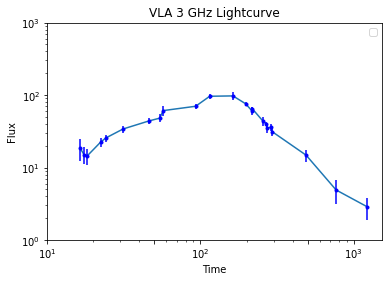

In [27]:
# Plot the lightcurve
plt.plot(time_vla, flux_vla )
plt.errorbar(time_vla,flux_vla,yerr=flux_error_vla,fmt='.',color='b')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('VLA 3 GHz Lightcurve')

yticks = [1, 10, 100, 1000]
plt.yscale('log') 
plt.yticks(yticks)


xticks = [10,50,100,500,1000]
plt.xscale('log')
plt.xticks(xticks)

plt.legend()
    
plt.show()


Using a logarithmic (log) scale for both the x-axis and y-axis in the lightcurve plot is necessary due to the wide range of astronomical data, particularly flux measurements. A linear scale might lead to a crowded or compressed plot, making it difficult to interpret variations accurately. By employing a log scale, the plot expands the data range, ensuring visibility of both faint and bright sources and highlighting variability. Moreover, a log-log plot simplifies the representation of power-law relationships and conveys multiplicative changes in flux effectively. Overall, the log scale enhances the visualization and understanding of radio astronomy data, making it easier to analyze fluctuations in flux measurements and detect significant patterns in the lightcurve.

We choose another instrument, say Chandra (https://chandra.harvard.edu/) an X-ray instrument
that has observations of our source at 2.41 × $10^{17}$ Hz. Let's make the lightcurve corresponding to Chandra X ray telescope now.

In [28]:
# Filter the data for Chandra telescope and viewing the data
chandra_data = data[(data['Telescope'] == 'Chandra') & (data['Freq'] == 2.41e17)]

chandra_data

DateUT,T,Telescope,Freq,FluxD,FluxDErr
str24,float64,str10,float64,str7,float64
2017-Aug-19.9,2.4,Chandra,2.41e+17,<2.3e-4,--
2017-Aug-26.7,9.2,Chandra,2.41e+17,4.48e-4,0.000131
2017-Sep-01.4,14.9,Chandra,2.41e+17,5.11e-4,9.6e-05
2017-Dec-04,109.0,Chandra,2.41e+17,2.11e-3,0.000185
2018-Jan-23,158.0,Chandra,2.41e+17,2.19e-3,0.000183
2018-May-04,259.0,Chandra,2.41e+17,1.15e-3,0.00014
2018-Aug-10,357.0,Chandra,2.41e+17,7.12e-4,0.000136
2019-Mar-22,581.0,Chandra,2.41e+17,2.63e-4,7.05e-05
2019-Aug-29,741.0,Chandra,2.41e+17,2.19e-4,7.31e-05


In [29]:
# Extract the time,fluxa nd flux error columns from the filtered data


time_chandra = chandra_data['T']
flux_chandra = chandra_data['FluxD']
flux_chandra_error = chandra_data['FluxDErr']


#Remove the data points which have non float Flux Densities or contain no Flux Density Error

flux_chandra = flux_chandra[1:]
time_chandra = time_chandra[1:]
flux_chandra = flux_chandra.astype(float)
flux_chandra_error = flux_chandra_error[1:]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


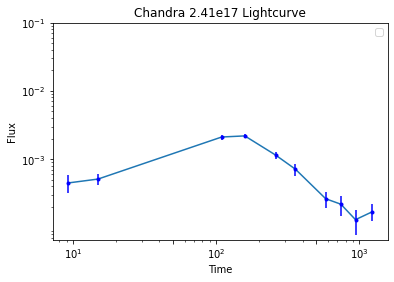

In [30]:
# Plot the lightcurve
plt.plot(time_chandra, flux_chandra)
plt.errorbar(time_chandra, flux_chandra, yerr= flux_chandra_error, fmt='.', color= 'b' )
plt.plot
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Chandra 2.41e17 Lightcurve')

yticks = [10e-2, 10e-3, 10e-4]
plt.yscale('log') 
plt.yticks(yticks)


xticks = [10,50,100,500,1000]
plt.xscale('log')
plt.xticks(xticks)

plt.legend()
plt.show()

Now let us Scale the Chandra flux densities to 3 GHz using $Fν ∝ ν^{−0.584}$ and over plot the Chandra data points over the VLA 3 GHz data points that we just plotted.

In [31]:
def scale(Freq1,FluxD1,Freq2):   #defining the scale function 
    return FluxD1*(Freq2/Freq1)**(-0.584)  

Scaled_Flux = scale(2.41e17,flux_chandra,3.0e9)

Text(0, 0.5, 'Flux')

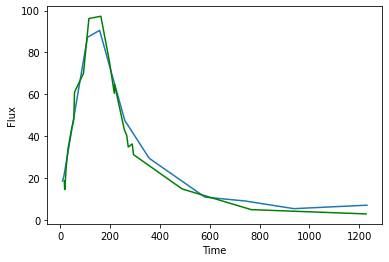

In [32]:
#Plotting both chandra scaled fux and vla flux together

plt.plot(time_chandra, Scaled_Flux)
plt.plot(time_vla, flux_vla, 'green')
plt.xlabel('Time')
plt.ylabel('Flux')